In [ ]:
# Tasks
- Drop a variable with too many null values
- Replace null values of the variables we would like to add on the ML model
- Minimize the dimensions of the variables


In [5]:
import pandas as pd

# Load the data: 

In [26]:
airports_df = pd.read_csv('../2008.csv')
airports_df

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,1343.0,1325,1451.0,1435,WN,588,...,4.0,9.0,0,NaN,0,16.0,0.0,0.0,0.0,0.0
1,2008,1,3,4,1125.0,1120,1247.0,1245,WN,1343,...,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,2009.0,2015,2136.0,2140,WN,3841,...,2.0,14.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,903.0,855,1203.0,1205,WN,3,...,5.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1423.0,1400,1726.0,1710,WN,25,...,6.0,10.0,0,NaN,0,16.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2389212,2008,4,17,4,1025.0,1025,1234.0,1237,DL,1207,...,5.0,16.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2389213,2008,4,17,4,1319.0,1320,1527.0,1524,DL,1208,...,9.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2389214,2008,4,17,4,1335.0,1335,1556.0,1553,DL,1209,...,7.0,31.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2389215,2008,4,17,4,1933.0,1935,2140.0,2141,DL,1210,...,9.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


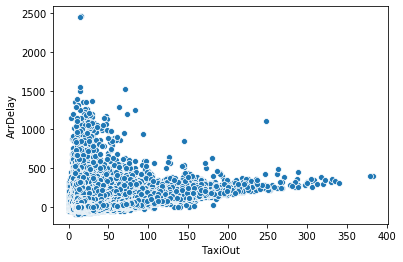

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

%matplotlib inline

sns.scatterplot(data=airports_df, x= 'TaxiOut', y = 'ArrDelay')
plt.show()

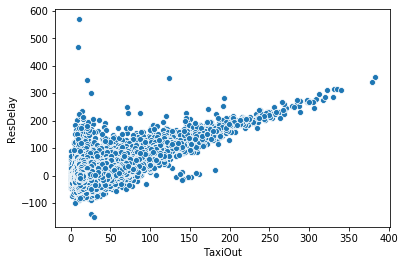

In [32]:
airports_df['ResDelay'] = airports_df['ArrDelay'] - airports_df['DepDelay']
sns.scatterplot(data=airports_df, x= 'TaxiOut', y = 'ResDelay')
plt.show()

# Drop the variables that we don't need: 

In [7]:
airports_df = airports_df.drop(["ArrTime", "ActualElapsedTime", "AirTime", "TaxiIn", "Diverted", "CarrierDelay",
                         "WeatherDelay", "NASDelay", "SecurityDelay", "LateAircraftDelay"], axis=1)
airports_df

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,CRSElapsedTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiOut,Cancelled,CancellationCode
0,2008,1,3,4,1343.0,1325,1435,WN,588,N240WN,70.0,16.0,18.0,HOU,LIT,393,9.0,0,NaN
1,2008,1,3,4,1125.0,1120,1245,WN,1343,N523SW,85.0,2.0,5.0,HOU,MAF,441,8.0,0,NaN
2,2008,1,3,4,2009.0,2015,2140,WN,3841,N280WN,85.0,-4.0,-6.0,HOU,MAF,441,14.0,0,NaN
3,2008,1,3,4,903.0,855,1205,WN,3,N308SA,130.0,-2.0,8.0,HOU,MCO,848,7.0,0,NaN
4,2008,1,3,4,1423.0,1400,1710,WN,25,N462WN,130.0,16.0,23.0,HOU,MCO,848,10.0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2389212,2008,4,17,4,1025.0,1025,1237,DL,1207,N393DA,132.0,-3.0,0.0,BOS,CVG,752,16.0,0,NaN
2389213,2008,4,17,4,1319.0,1320,1524,DL,1208,N952DL,124.0,3.0,-1.0,CVG,BOS,752,12.0,0,NaN
2389214,2008,4,17,4,1335.0,1335,1553,DL,1209,N392DA,138.0,3.0,0.0,BOS,CVG,752,31.0,0,NaN
2389215,2008,4,17,4,1933.0,1935,2141,DL,1210,N3756,126.0,-1.0,-2.0,CVG,BOS,752,12.0,0,NaN


# 1) Feature Engineering
## 1. Imputation
## locate variables with missing values: 

In [8]:
airports_df.isnull().any()

Year                False
Month               False
DayofMonth          False
DayOfWeek           False
DepTime              True
CRSDepTime          False
CRSArrTime          False
UniqueCarrier       False
FlightNum           False
TailNum              True
CRSElapsedTime       True
ArrDelay             True
DepDelay             True
Origin              False
Dest                False
Distance            False
TaxiOut              True
Cancelled           False
CancellationCode     True
dtype: bool

NameError: name 'head' is not defined

<span style="color:blue">[Discussion] (Soo) Drop `CancellationCode` due to its too many null data </span>.

In [9]:
airports_df.isnull().sum() 

Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime               64442
CRSDepTime                0
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum               42452
CRSElapsedTime          407
ArrDelay              70096
DepDelay              64442
Origin                    0
Dest                      0
Distance                  0
TaxiOut               64442
Cancelled                 0
CancellationCode    2324775
dtype: int64

<span style="color:blue">[Discussion] (Soo) What should we do `DepTime`, `TailNum`, `CRSElapsedTime`, `ArrDelay`, `DepDelay`, `TaxiOut`? </span>

In [18]:
threshold = 0.9
columns_with_null = airports_df.columns[airports_df.isnull().mean() > threshold] 
rows_with_null = airports_df.loc[airports_df.isnull().mean(axis=1) > threshold] 

In [19]:
columns_with_null

Index(['CancellationCode'], dtype='object')

In [20]:
rows_with_null

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,CRSElapsedTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiOut,Cancelled,CancellationCode


# Treat categorical variables: 

In [ ]:
# Split the dataframe: 
airports_df.dtypes

# List categorical variables:
cat_mask = (airports_df.dtypes==object)
cat_cols = airports_df.columns[cat_mask].tolist()
df_cat = airports_df[cat_cols]

df_num = airports_df.drop(cat_cols, axis=1)
# categorical columns = df_cat
# numerical columns = df_num

df_cat

In [ ]:
df_num

In [ ]:
# impute column "CancellationCode" with variables "UniqueCarrier"
from sklearn.impute import SimpleImputer

imp_cat = SimpleImputer(strategy='most_frequent')

df_cat = pd.DataFrame(imp_cat.fit_transform(df_cat),
                     columns=df_cat.columns, index=df_cat.index)
df_cat